In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#read unstructured csv to appropriate dataframe representation
diabetes_df = pd.read_csv('diabetes_data.csv')
columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weightloss', 'weakness', 'polyphagia',
          'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
          'muscle_stiffness', 'alopecia', 'obesity', 'class']
diabetes_df = diabetes_df.iloc[:,0].str.split(';', expand=True)
diabetes_df.columns = columns
diabetes_df.head()

,age,gender,polyuria,polydipsia,sudden_weightloss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
#drop column unrelated to diagnose result
diabetes_pre = diabetes_df.drop('gender', axis = 1)

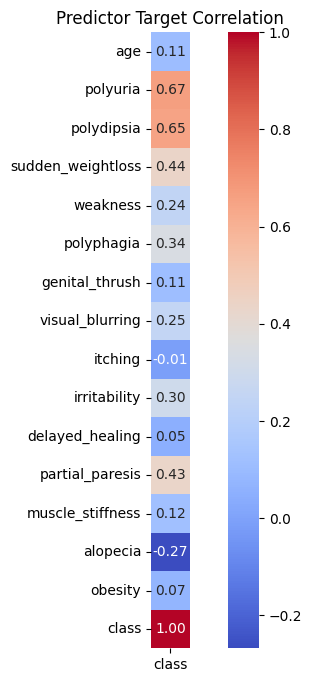

In [4]:
#calculate correlation for all column
correlation_matrix = diabetes_pre.corr()
#pick specifically for correlation to class column
target_correlation = correlation_matrix['class']

plt.figure(figsize=(10,8))
sns.heatmap(target_correlation.to_frame(), annot = True, cmap = 'coolwarm', fmt = '.2f', cbar=True, square=True)
plt.title('Predictor Target Correlation')
plt.show()
#only 4 predictors has high correlation to target (polyuria, polydipsia, sudden_weightloss, and partial_paresis
#other predictors can be discarded since they

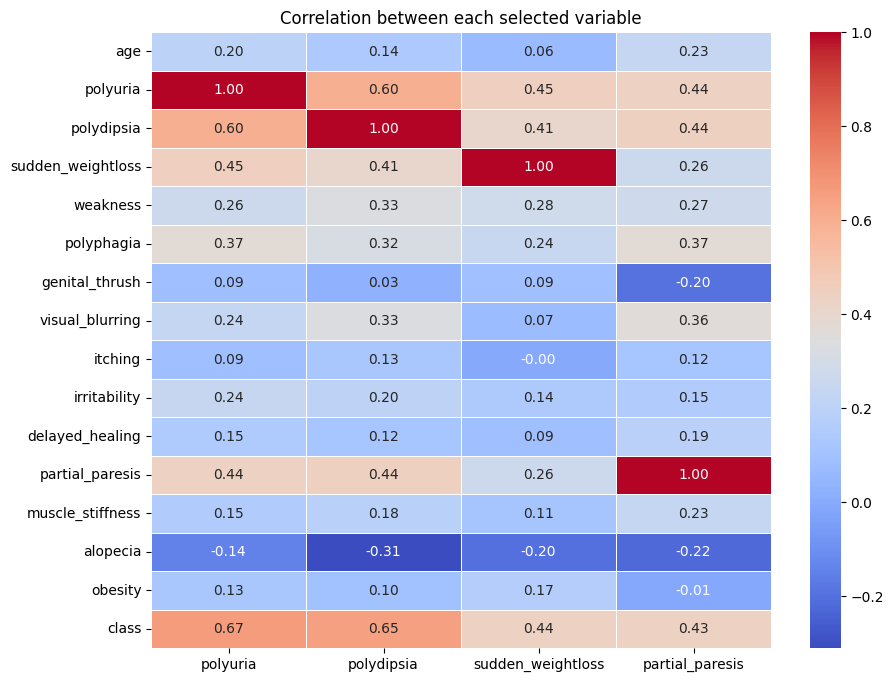

In [5]:
linear_var = ['polyuria', 'polydipsia', 'sudden_weightloss', 'partial_paresis']
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix[linear_var], annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation between each selected variable')
plt.show()
#polyuria and polydipsia has high correlation, a symptom of multicollinearity
#polydipsia is an urge to drink water
#polydipsia is excessive urination
#in this case, we'll try discarding polyuria since it has quite average high correlation to the other 3

In [6]:
column_todrop = ['age', 'polyuria', 'weakness', 'polyphagia', 'genital_thrush',
                'visual_blurring', 'itching', 'irritability', 'delayed_healing',
                'muscle_stiffness', 'alopecia', 'obesity']
diabetes_pre.drop(column_todrop, axis = 1, inplace = True)
diabetes_pre.head()

,polydipsia,sudden_weightloss,partial_paresis,class
0,1,0,0,1
1,0,0,1,1
2,0,0,0,1
3,0,1,0,1
4,1,1,1,1


In [7]:
#setting column data types to correct one
diabetes_pre = diabetes_pre.astype(int)

In [8]:
#standardization is not done since all predictor has exact same range
#splitting train and test data
y = diabetes_pre['class']
X = diabetes_pre.drop('class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=123)
X_train, y_train

(     polydipsia  sudden_weightloss  partial_paresis
 252           1                  1                1
 513           1                  1                1
 401           0                  0                0
 276           0                  0                0
 73            1                  1                1
 ..          ...                ...              ...
 69            1                  1                1
 299           1                  1                1
 333           0                  0                0
 246           0                  0                0
 62            1                  0                1
 
 [364 rows x 3 columns],
 252    1
 513    1
 401    0
 276    0
 73     1
       ..
 69     1
 299    1
 333    0
 246    0
 62     1
 Name: class, Length: 364, dtype: int32)

In [10]:
#from analysis in decision tree, it is known that all variable has balanced size for all its values
# C = 1 / (alpha * n), where n is the number of samples.
param_grid = {'C' : [0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression() #l2 is the default penalty
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# we pick hyperparameter C of 0.1, since it ranked first, has lowest score time with lowest stdev of score time (prediction time)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008275,0.007141,0.004371,0.005217,0.01,{'C': 0.01},0.621622,0.621622,0.621622,0.621622,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.615315,0.005149,5
1,0.007574,0.006222,0.001953,0.004557,0.1,{'C': 0.1},0.864865,0.783784,0.918919,0.837838,0.916667,0.777778,0.750000,0.916667,0.805556,0.916667,0.848874,0.063258,1
2,0.008081,0.007364,0.004686,0.007163,1,{'C': 1},0.837838,0.756757,0.810811,0.783784,0.916667,0.777778,0.666667,0.861111,0.805556,0.833333,0.805030,0.063394,2
3,0.007354,0.007085,0.004723,0.007216,10,{'C': 10},0.837838,0.756757,0.810811,0.783784,0.916667,0.777778,0.666667,0.861111,0.805556,0.833333,0.805030,0.063394,2
4,0.009008,0.007685,0.003096,0.006196,100,{'C': 100},0.837838,0.756757,0.810811,0.783784,0.916667,0.777778,0.666667,0.861111,0.805556,0.833333,0.805030,0.063394,2


In [16]:
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train, y_train)
y_logreg_train_predict = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_logreg_train_predict)
print(f'Training accuracy : {train_accuracy:.2f}')

Training accuracy : 0.85


In [17]:
y_logreg_test_predict = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_logreg_test_predict)
print(f'Test accuracy : {test_accuracy:.2f}')

Test accuracy : 0.77
